In [37]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:

# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [4]:
from load_dataset import load_data_from_postgres, load_data_using_sqlalchemy, load_data
from sql_utils import execute_telecom_queries



In [5]:
df=load_data()

Successfully loaded the data


### Continue with EDA

In [6]:
# Display the first few rows
df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,42376.0,41915.0,81230763.0,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,NaN,NaN,NaN,NaN,223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,17264.0,16759.0,97970704.0,Apple,Apple iPhone Se (A1723),NaN,NaN,NaN,NaN,NaN,NaN,105.0,102.0,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,6.0,43.0,47.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,25003.0,28640.0,98249527.0,Apple,Apple iPhone Xs (A2097),NaN,NaN,NaN,NaN,NaN,NaN,104.0,108.0,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795322e+06,32928.43438,5.750753e+06,2.056542e+06,1.791729e+06,467373.44194,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

### Missing values

In [10]:
# Check for missing values
df.isnull().sum()


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

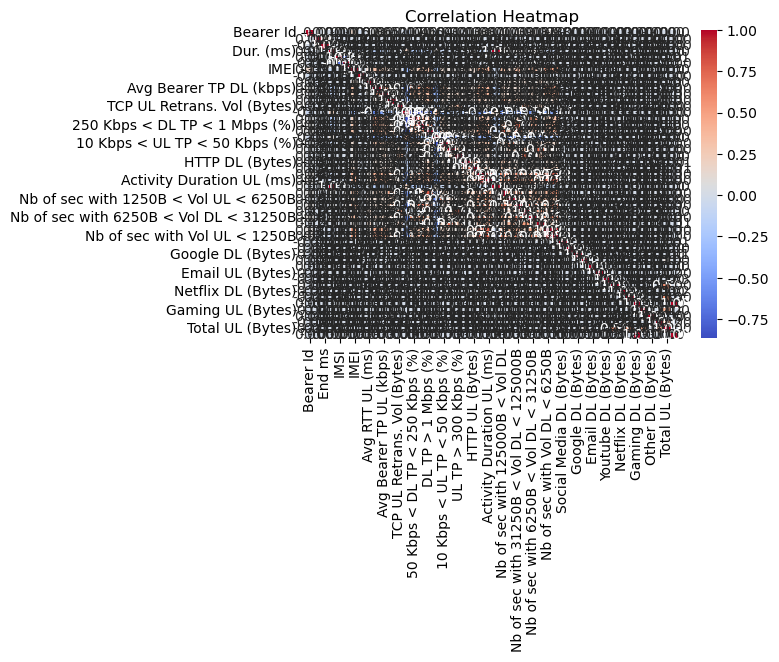

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check if there are any numeric columns
if numeric_df.empty:
    print("No numeric columns found for correlation analysis.")
else:
    # Create the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

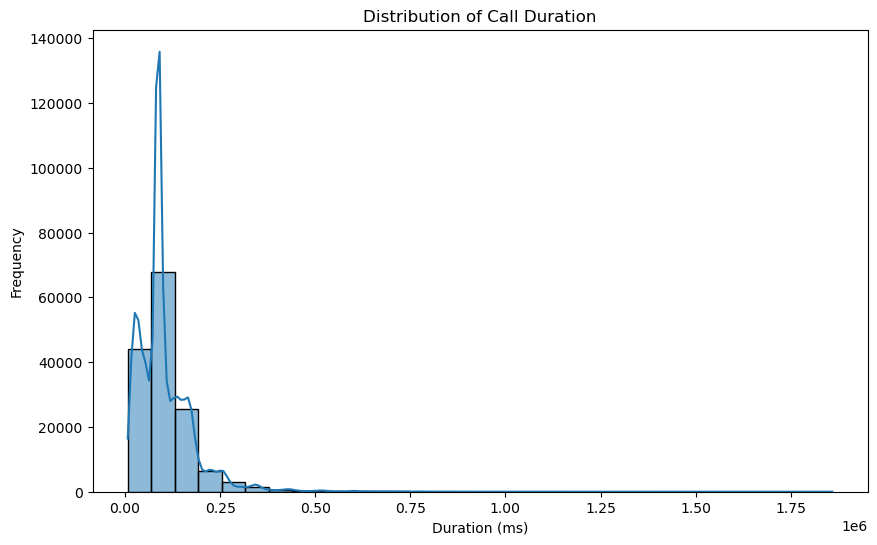

In [13]:
# Histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


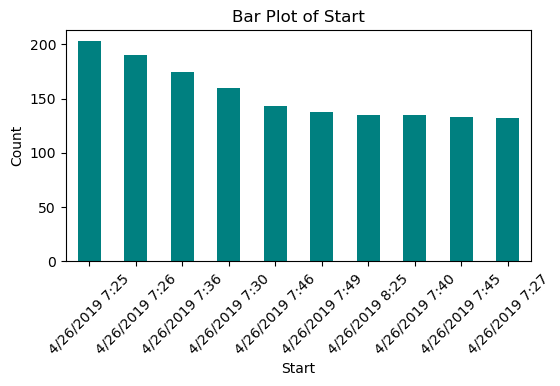

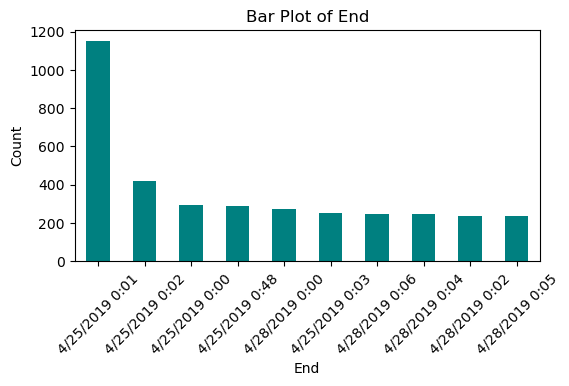

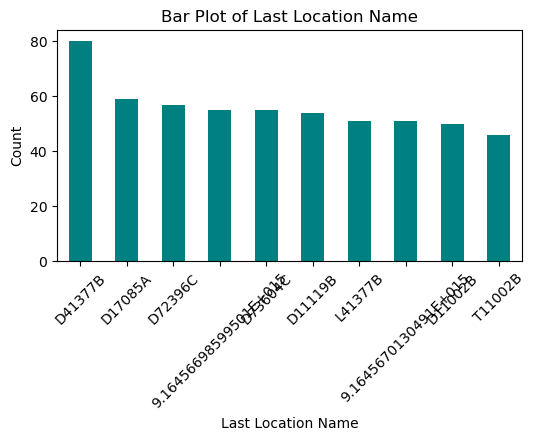

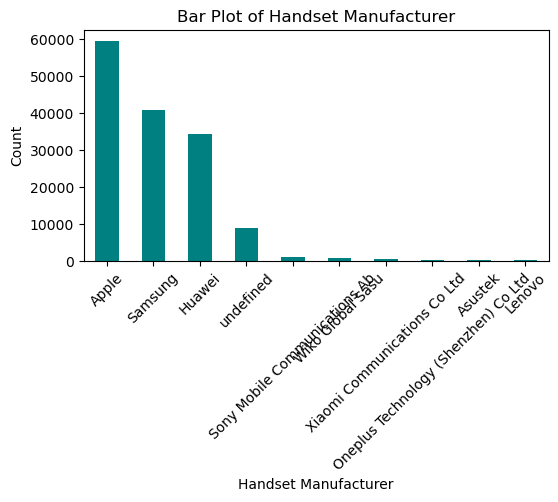

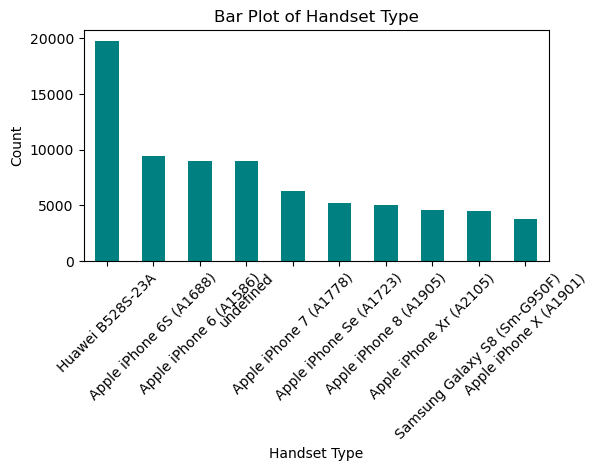

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts().head(10).plot(kind='bar', color='teal')
    plt.title(f'Bar Plot of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [15]:
# Average duration by Last Location Name
avg_duration_by_location = df.groupby('Last Location Name')['Dur. (ms)'].mean().reset_index()
print(avg_duration_by_location.sort_values(by='Dur. (ms)', ascending=False))


         Last Location Name  Dur. (ms)
33951               T53539A  1177517.0
1342   CELL_208_20_520166_7  1134225.0
6056                D20985B  1038128.0
17025               D94074C  1010097.0
37089               T76656C   985972.0
...                     ...        ...
20518               G92776B     7327.0
18917               G52206C     7326.0
20510               G92604C     7267.0
18612               G30104B     7258.0
18635               G30532C     7146.0

[45547 rows x 2 columns]


### Missing values handling

In [17]:
# Check the columns total rows of NaN values
nan_in_same_row = df['Bearer Id'].isnull() | df['MSISDN/Number'].isnull()  | df['IMEI'].isnull()  | df['IMSI'].isnull()

# Get the rows where both columns are NaN
rows_with_nan = df[nan_in_same_row]

# Display the result
print("Rows where these columns have NaN values:")
print(rows_with_nan.shape)

Rows where these columns have NaN values:
(1495, 55)


In [18]:
# Specify the columns to drop
columns_to_check = ['Bearer Id', 'MSISDN/Number', 'IMSI', 'IMEI']

# Drop rows where any of the specified columns have missing values
df.dropna(subset=columns_to_check, inplace=True)
df.shape

(148506, 55)

In [21]:
# Handling missing Catagorical Data
df['Last Location Name'] = df['Last Location Name'].fillna(df['Last Location Name'].mode()[0])
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].median())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].median())


In [22]:
# Columns below 1% missing values
columns_to_fill = [  'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
      ]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

In [24]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, KNNImputer

In [25]:
## columns with more than 50% missing values that are useful for next tasks 

cols_to_impute = ['TCP DL Retrans. Vol (Bytes)',  'TCP UL Retrans. Vol (Bytes)']

imputer = IterativeImputer(random_state=0)
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


# # Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
# # Impute only the selected columns
df[cols_to_impute] = knn_imputer.fit_transform(df[cols_to_impute])
# Verify imputation
print(df[cols_to_impute].isnull().sum())



TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
dtype: int64


In [26]:
from sklearn.impute import SimpleImputer

In [27]:
# # The rest of the Columns with more than 50% missing values
columns_to_impute = [
    'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with 125000B < Vol DL',
    'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 6250B < Vol DL < 31250B',
    'HTTP UL (Bytes)',
    'HTTP DL (Bytes)'
]


simple_imputer = SimpleImputer(strategy='median')
df[columns_to_impute] = simple_imputer.fit_transform(df[columns_to_impute])

In [28]:
# Change Date format 
df['Start'] =  pd.to_datetime(df['Start'])
df['End'] =  pd.to_datetime(df['End'])

In [32]:
from utils import missing_values_table, rename_column, non_missing_values_table
missing_values_table(df)

Your selected dataframe has 55 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype,Values,Unique Values


In [33]:
non_missing_values_table(df)

Your selected DataFrame has 55 columns.
There are 55 columns that have no missing values.


,Column Name,Data Type,Total Values,Unique Values
0,Bearer Id,float64,148506,134255
1,Start,datetime64[ns],148506,9988
2,Start ms,float64,148506,1000
3,End,datetime64[ns],148506,6401
4,End ms,float64,148506,1000
5,Dur. (ms),float64,148506,88816
6,IMSI,float64,148506,106470
7,MSISDN/Number,float64,148506,106471
8,IMEI,float64,148506,106477
9,Last Location Name,object,148506,45379


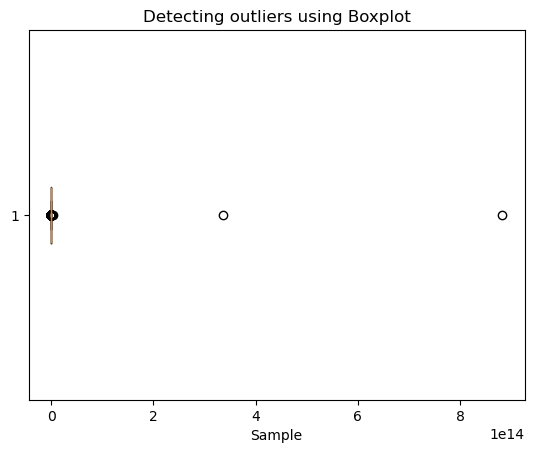

In [35]:
# 
plt.boxplot(df['MSISDN/Number'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [38]:
# Function to handle outliers using IQR
def handle_outliers_iqr(df, threshold = 1.5):
    dff = df.copy()
    numeric_cols = dff.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.1)
        Q3 = df[col].quantile(0.9)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        

        # Cap outliers 
        dff[col] = np.where(df[col] > upper_bound, upper_bound, dff[col])
        dff[col] = np.where(df[col] < lower_bound, lower_bound, dff[col])

    return dff

# Handle outliers
df_cleaned = handle_outliers_iqr(df)

In [39]:
df_cleaned.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,411762.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,37624.0,38787.0,4.117629e+08,Samsung,Samsung Galaxy A5 Sm-A520F,131.0,53.0,168.0,8.0,293.0,8.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,411762.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,168.0,3560.0,4.117629e+08,Samsung,Samsung Galaxy J5 (Sm-J530),131.0,53.0,168.0,8.0,293.0,8.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,411762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,45.0,5.0,6.0,9.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,0.0,0.0,4.117629e+08,Samsung,Samsung Galaxy A8 (2018),131.0,53.0,168.0,8.0,293.0,8.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,411762.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,45.0,5.0,44.0,44.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,3330.0,37882.0,4.117629e+08,undefined,undefined,131.0,53.0,168.0,8.0,293.0,8.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,411762.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,45.0,5.0,6.0,9.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,0.0,0.0,4.117629e+08,Samsung,Samsung Sm-G390F,131.0,53.0,168.0,8.0,293.0,8.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [41]:
df_cleaned.End

0        2019-04-25 14:35:00
1        2019-04-25 08:15:00
2        2019-04-25 11:58:00
3        2019-04-25 07:36:00
4        2019-04-25 10:40:00
                 ...        
149995   2019-04-30 00:01:00
149996   2019-04-30 06:02:00
149997   2019-04-30 10:41:00
149998   2019-04-30 10:46:00
149999   2019-04-30 10:40:00
Name: End, Length: 148506, dtype: datetime64[ns]

In [42]:
df_cleaned.describe()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148506,148506.000000,148506,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.0,148506.0,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.0,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.014676e+19,2019-04-26 12:40:48.378247424,499.205143,2019-04-27 17:52:12.953012480,498.640196,103477.498579,2.082015e+14,3.367460e+10,4.850068e+13,61.824845,10.835475,13092.298296,1397.857831,1.465948e+07,5.440912e+05,92.942972,2.939551,1.564691,1.261373,98.953335,0.499946,0.0,0.0,1.117177e+07,6.687129e+05,1.304254e+06,9.793095e+05,1.034780e+08,225.633617,83.575613,285.341286,8.0,470.862800,9.193730,3391.583485,3558.369446,1.795144e+06,32922.085512,5.751770e+06,2.056293e+06,1.791785e+06,467403.486896,1.163387e+07,1.100857e+07,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111937e+07,4.546640e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7142.000000,2.081993e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,35.000000,0.000000,0.000000,0.000000,92.500000,0.000000,0.0,0.0,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,8.0,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:47:00,250.000000,2019-04-26 07:36:00,251.000000,58248.750000,2.082014e+14,3.365131e+10,3.546071e+13,35.000000,3.000000,43.000000,47.000000,1.410988e+06,6.582400e+04,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.0,0.0,2.007958e+06,2.359060e+05,1.484800e+04,2.149900e+04,5.824964e+07,131.000000,53.000000,168.000000,8.0,293.000000,8.000000,87.000000,106.000000,8.990445e+05,16431.000000,2.883393e+06,1.023967e+06,8.926208e+05,233445.000000,5.833290e+06,5.515832e+06,5.778898e+06,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,3.321828e+07,2.431263e+08
50%,7.349883e+18,2019-04-26 08:52:00,499.000000,2019-04-27 23:04:00,500.000000,86399.000000,2.082015e+14,3.366371e+10,3.572231e+13,45.000000,5.000000,63.000000,62.000000,2.100477e+07,7.663761e+05,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,2.007958e+06,2.359060e+05,3.901850e+04,4.648100e+04,8.639999e+07,131.000000,53.000000,168.000000,8.0,293.000000,8.000000,201.000000,216.00

In [43]:
df_cleaned.to_csv('../data/df_cleaned.csv', index=False)